#  **<center><div style="background-color: lightgray;"><span style="color: black">Fraud Detection in Banking Transactions</span>**</div></center>

### **<span style="color:black">Author Name: Mahrose Siddiqui</span>**

#### **<span style="color:black">Author Email: mahrosesiddiqui18@gmail.com</span>**

####  **<span style="color:black">CONNECT THROUGH</span>**

[<img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="50" height="50">](https://www.linkedin.com/in/mahrose-siddiqui/)     [<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="50" height="50">](https://www.kaggle.com/mahrosesiddiqui)  [<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="50" height="50">](https://github.com/MahroseSiddiqui)  [<img src="https://png.pngtree.com/png-vector/20221018/ourmid/pngtree-twitter-social-media-round-icon-png-image_6315985.png" width="50" height="50">](https://twitter.com/MahroseSiddiqui)  

###  **<center><div style="background-color: white;"><span style="color: black">EXPLORATORY DATA ANALYSIS (EDA)</span>**</div></center>

###  **<div style="background-color:Darkorange;"><span style="color: white">IMPORT LIBRARIES</span>**</div>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

###  **<div style="background-color:Darkorange;"><span style="color: white">IMPORTING DATA</span>**</div>

In [56]:
df = pd.read_csv("fraud_detection_bank_dataset.csv")

In [57]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0  col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  \
0           0      9   1354      0     18      0      1      7      9      0   
1           1      0    239      0      1      0      1      0      0      0   
2           2      0    260      0      4      0      3      6      0      0   
3           3     17    682      0      1      0      0      8     17      0   
4           4      1    540      0      2      0      1      7      1      0   

   ...  col_103  col_104  col_105  col_106  col_107  col_108  col_109  \
0  ...        0        0        0        1        1        0        0   
1  ...        0        1        0        0        0        0        0   
2  ...        0        0        0        1        1        0        0   
3  ...        0        1        0        1        1        0        0   
4  ...        0        0        0        1        1        0        0   

   col_110  col_111  targets  
0        0       49        1  
1        0       5

In [58]:
# Check the dimensions of the dataset
print(df.shape)

(20468, 114)


In [59]:
# Get an overview of the dataset, including column data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB
None


In [60]:
# Summary statistics of numerical columns
print(df.describe())

         Unnamed: 0         col_0         col_1         col_2         col_3  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.000000   
mean   10233.500000      3.226256    294.793043      0.420021      2.329343   
std     5908.746991     20.564308    717.541984      7.367275     10.068512   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     5116.750000      0.000000     38.000000      0.000000      0.000000   
50%    10233.500000      0.000000     97.000000      0.000000      1.000000   
75%    15350.250000      2.000000    283.000000      0.000000      2.000000   
max    20467.000000   2301.000000  37808.000000    904.000000    772.000000   

              col_4         col_5         col_6         col_7    col_8  ...  \
count  20468.000000  20468.000000  20468.000000  20468.000000  20468.0  ...   
mean       0.083594      0.939857      2.386066      3.226256      0.0  ...   
std        0.840537      4.222896      3.018140    

In [61]:
# Count the number of unique values in each column
print(df.nunique())

Unnamed: 0    20468
col_0           142
col_1          1920
col_2            53
col_3           115
              ...  
col_108           2
col_109           2
col_110          13
col_111         381
targets           2
Length: 114, dtype: int64


In [62]:
# Count the number of missing values in each column
print(df.isnull().sum())

Unnamed: 0    0
col_0         0
col_1         0
col_2         0
col_3         0
             ..
col_108       0
col_109       0
col_110       0
col_111       0
targets       0
Length: 114, dtype: int64


###  **<div style="background-color:Darkorange;"><span style="color: white">DATA VISUALIZATION</span>**</div>

In [63]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='col_1', y='col_2', z='col_3', color='targets')
fig.show()

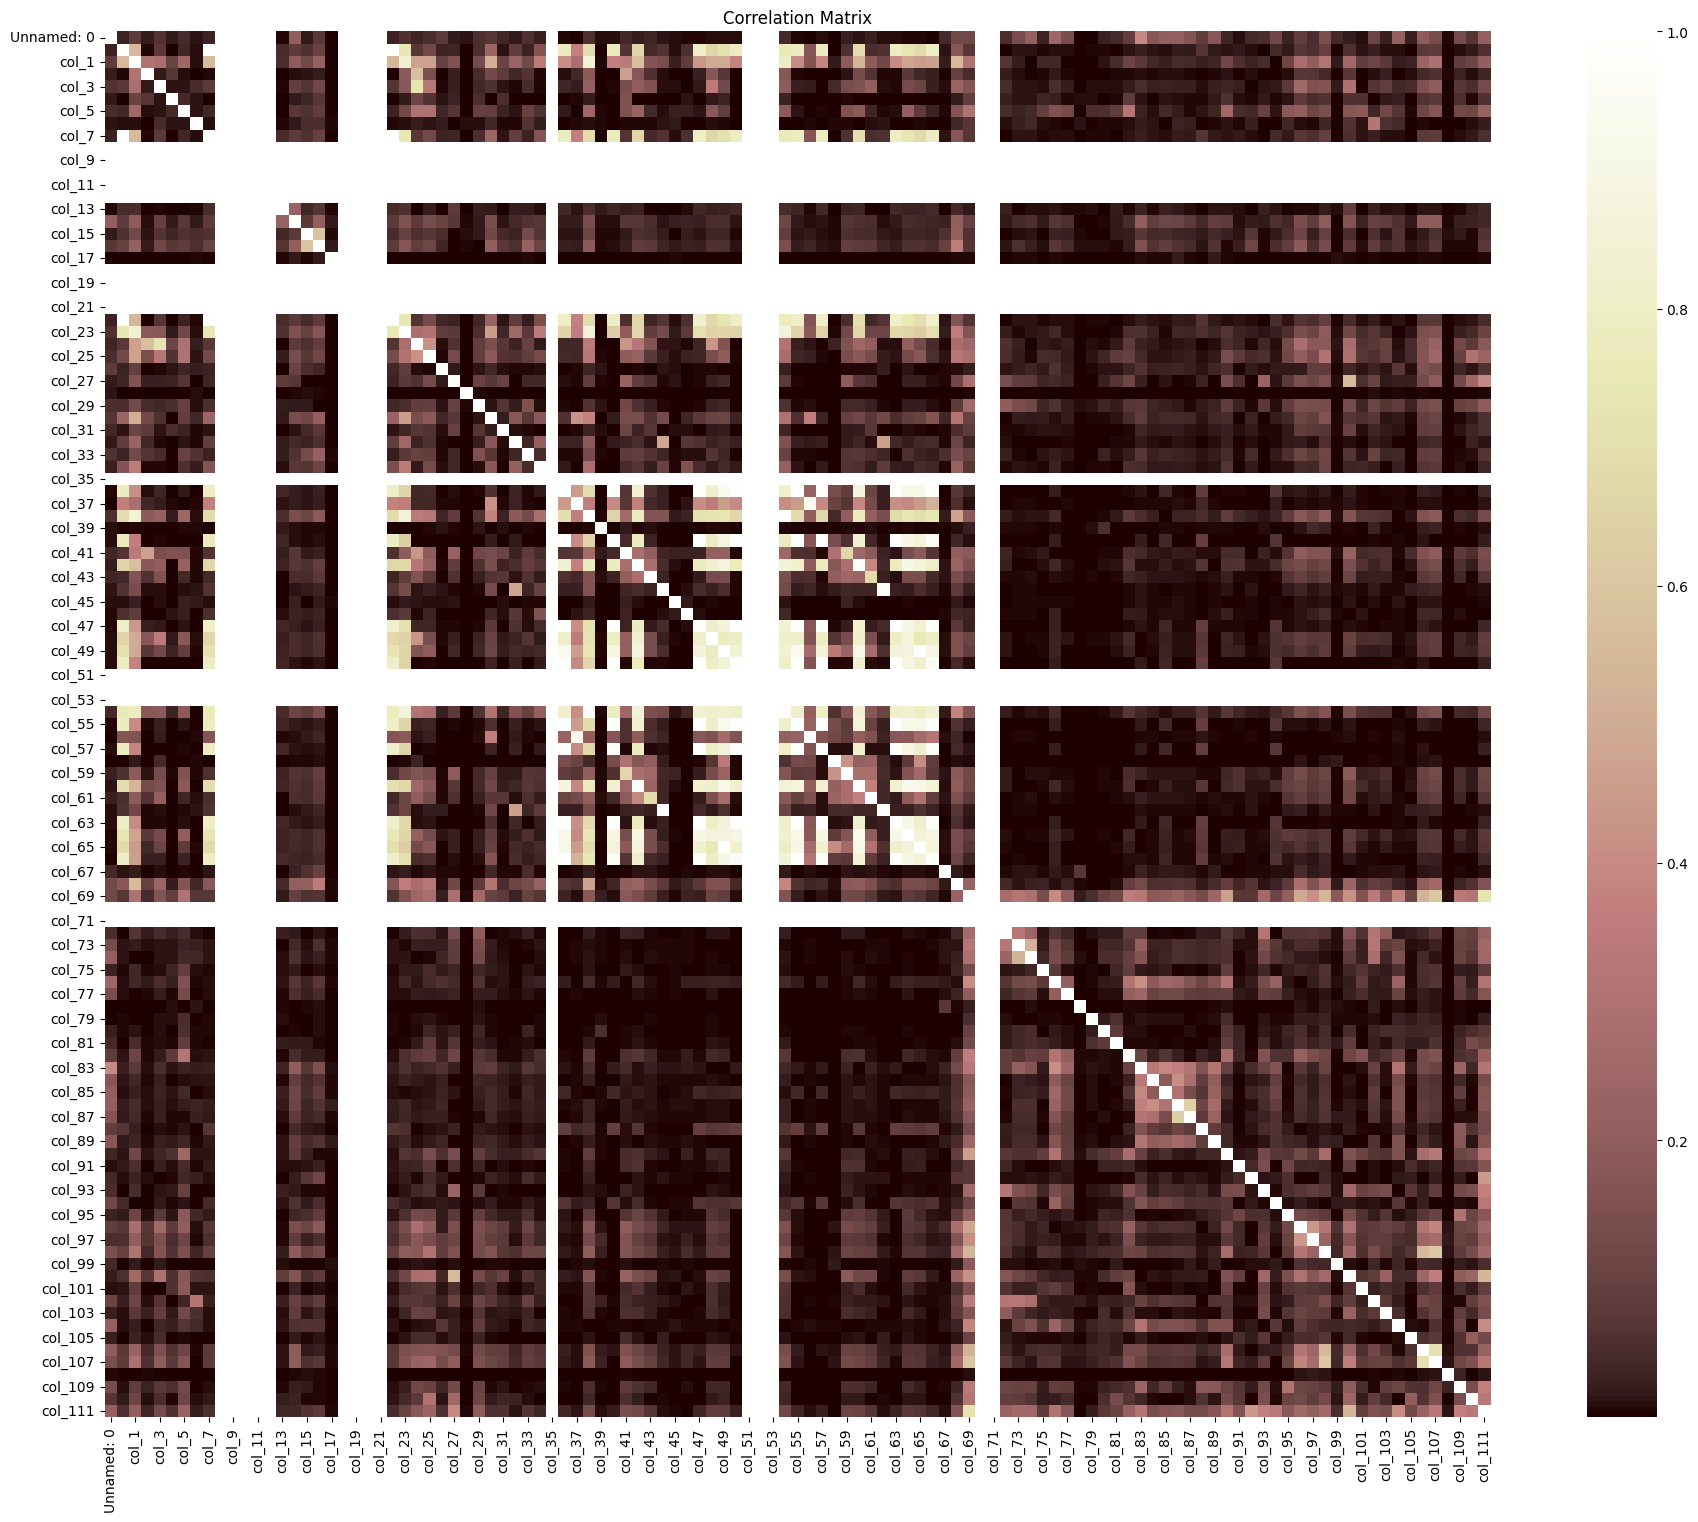

In [64]:
Correlation_matrix = df.drop(['targets'], axis =1).corr().abs()
plt.figure(figsize=(25, 18))
sns.heatmap(Correlation_matrix, annot=False, cmap='pink', square=True)
plt.title('Correlation Matrix')
plt.show()

###  **<center><div style="background-color: white;"><span style="color: black">MACHINE LEARNING ALGORITHMS</span>**</div></center>

In [65]:
X = df.drop('targets', axis=1)
y = df['targets']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16374, 113), (4094, 113), (16374,), (4094,))

###  **<div style="background-color:Darkorange;"><span style="color: white">LOGISTIC REGRESSION</span>**</div>

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

c:\Users\DELL\miniconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9985344406448461

<AxesSubplot: >

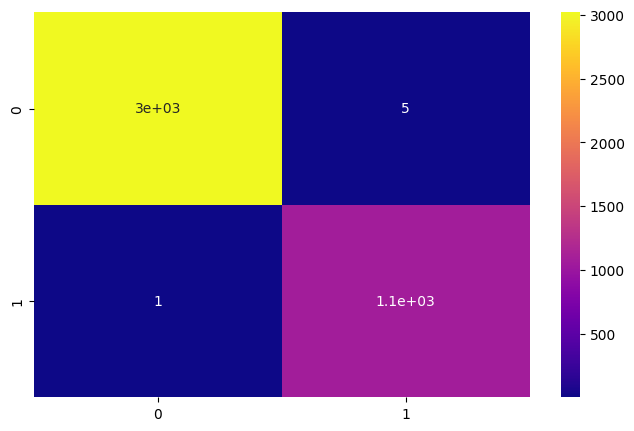

In [75]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, cmap='plasma')

###  **<div style="background-color:Darkorange;"><span style="color: white">CLASSIFICATION REPORT</span>**</div>

In [76]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3025\n           1       1.00      1.00      1.00      1069\n\n    accuracy                           1.00      4094\n   macro avg       1.00      1.00      1.00      4094\nweighted avg       1.00      1.00      1.00      4094\n'

###  **<div style="background-color:Darkorange;"><span style="color: white">DECISION TREE CLASSIFICATION</span>**</div>

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

1.0

<AxesSubplot: >

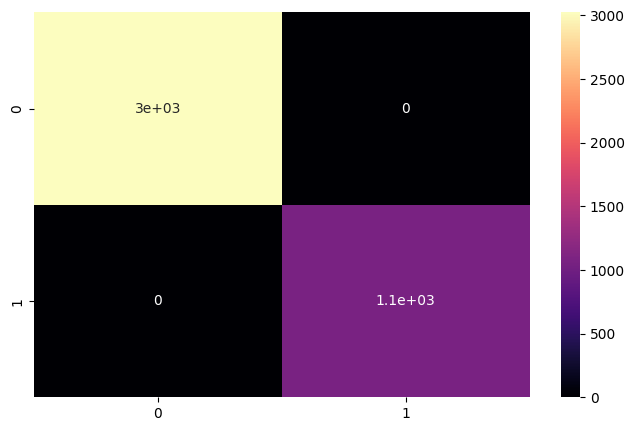

In [78]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, cmap='magma')